In [1]:
import tensorflow as tf
from tensorflow import keras
print(tf.__version__)

print(keras.__version__)

2.8.0
2.8.0


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [3]:
# load data
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 4s 0us/step


In [4]:
X_train_full.shape

(60000, 28, 28)

* Podzielmy pełny zestaw treningowy na zestaw walidacyjny i zestaw treningowy. 
* Kolor pikseli skalujemy również do zakresu 0-1 i przekształcamy na zmiennoprzecinkowe, dzieląc przez 255.

In [5]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

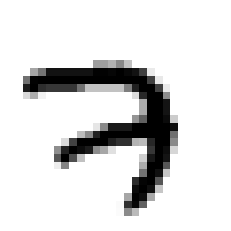

In [6]:
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

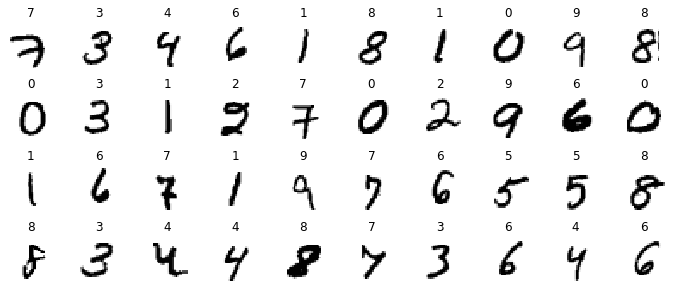

In [7]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(y_train[index], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [8]:
from keras.utils import np_utils
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

y_valid = np_utils.to_categorical(y_valid)

print(y_train)

[[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]


# Zad
Zbuduj i naucz sieć neuronową zgodnie z poniższym schematem. 

In [10]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten

from keras.callbacks import History

history = History()
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(300, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 300)               235500    
                                                                 
 dense_4 (Dense)             (None, 100)               30100     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.compile(loss="binary_crossentropy", optimizer="Adam", metrics=["accuracy"])

In [15]:
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid), batch_size=32)

Epoch 1/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.0452 - accuracy: 0.9308 - val_loss: 0.0207 - val_accuracy: 0.9676
Epoch 2/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0173 - accuracy: 0.9740 - val_loss: 0.0162 - val_accuracy: 0.9730
Epoch 3/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0115 - accuracy: 0.9825 - val_loss: 0.0132 - val_accuracy: 0.9820
Epoch 4/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.0083 - accuracy: 0.9875 - val_loss: 0.0151 - val_accuracy: 0.9764
Epoch 5/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0062 - accuracy: 0.9911 - val_loss: 0.0126 - val_accuracy: 0.9816
Epoch 6/10
1719/1719 [==============================] - 4s 3ms/step - loss: 0.0045 - accuracy: 0.9933 - val_loss: 0.0130 - val_accuracy: 0.9818
Epoch 7/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0041 - accuracy: 0.9941 - val_loss: 0.0142 - val_accuracy:

In [16]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0162 - accuracy: 0.9807


[0.01620989851653576, 0.9807000160217285]

In [25]:
X_new = X_test[:12]
y_proba = model.predict(X_new)
y_proba.round(2)
y_proba

array([[1.19944149e-19, 6.57375425e-19, 1.01532781e-18, 1.42628265e-16,
        2.40606471e-19, 1.68593884e-17, 1.99125921e-21, 1.00000000e+00,
        2.65681727e-19, 5.60673184e-16],
       [3.34115350e-26, 1.44384262e-18, 1.00000000e+00, 4.01974625e-25,
        4.98136523e-25, 5.82720334e-26, 5.82218752e-24, 3.47393556e-24,
        1.27268239e-23, 1.41556979e-34],
       [1.76513779e-13, 1.00000000e+00, 2.31823960e-09, 2.81345941e-14,
        1.17990639e-09, 1.65966102e-10, 1.13889766e-10, 1.24652484e-08,
        2.76695805e-10, 1.32909231e-15],
       [1.00000000e+00, 1.37156359e-13, 8.02427569e-12, 2.24393380e-13,
        4.61720939e-12, 1.12062750e-13, 1.03086477e-10, 1.30032335e-12,
        6.66954696e-16, 5.03033344e-11],
       [2.96843175e-11, 2.39553577e-09, 5.78166508e-12, 9.21347756e-14,
        1.00000000e+00, 1.16756247e-12, 8.27265700e-10, 3.45800544e-08,
        5.84080917e-12, 5.05680298e-09],
       [4.58042567e-13, 9.99999523e-01, 4.13016924e-13, 2.79006618e-15,
   

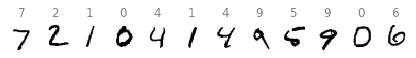

In [27]:
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 12, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(np.argmax(y_proba[index]), fontsize=12, color="gray")
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()